<a href="https://colab.research.google.com/github/WallE1602/GoogleColab/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Initial Steps**

Importing required libraries

As we can see here we will be using numpy, pandas, matplotlib and sklearn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importing and storing the dataset in pandas dataframe for Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))
# Dataset is now stored in a Pandas Datafr

NameError: ignored

# Loading dataset and setting initial index column.

In [ ]:
data = pd.read_csv ('Mall_Customers.csv', index_col='CustomerID')
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# **Outliers**
These are basically observations that are different in value than the overall sample pattern. ML doesn't work well when outliers exist.
Here we will check whether our dataset contains any outliers.

Text(0.5, 1.0, 'Boxplot of Annual Income')

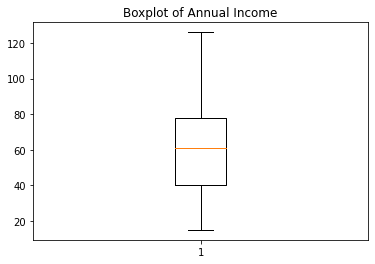

In [ ]:
plt.boxplot(data['Annual Income (k$)'])
plt.title('Boxplot of Annual Income')

## Using IQR method
IQR =  Interquartile Range Method
Outliers will be handled using this method.


In [ ]:
Q1 = np.percentile(data['Annual Income (k$)'],25,interpolation='midpoint')
Q2 = np.percentile(data['Annual Income (k$)'],50,interpolation='midpoint')
Q3 = np.percentile(data['Annual Income (k$)'],75,interpolation='midpoint')

IQR=Q3-Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit= Q3 + 1.5 * IQR

outlier=[]
for i in data['Annual Income (k$)']:
  if ((i>upper_limit)or(i<lower_limit)):
    outlier.append(i)

In [ ]:
outlier_index=data['Annual Income (k$)']>upper_limit
data.loc[outlier_index].index

Int64Index([], dtype='int64', name='CustomerID')

## Exploratory Data Analysis (EDA)



We'll look at different data that will help us to find describe data more effectively and find crucial patterns.

## **Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


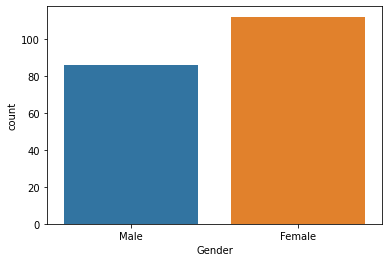

In [ ]:
sns.countplot(data['Gender'])

The univariate dist of Age shows us a parametric distribution of our data similar to the graph givne below.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


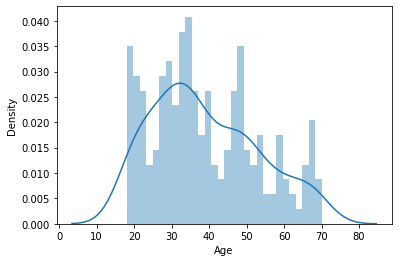

In [ ]:
sns.distplot(data['Age'], bins=30)

## **Bivariate Analysis**

here we will try to turn our gender feature to a numerical datatype to illustrate an analysis of two variables for concurrent relations.


```
# This is formatted as code
```



In [ ]:
gender= {'Male':0, 'Female':1}
data['Gender']= data['Gender'].map(gender)

**Scatter plot between Age and Spending Score**

Text(0.5, 1.0, 'Scatter plot between Age and Spending Score')

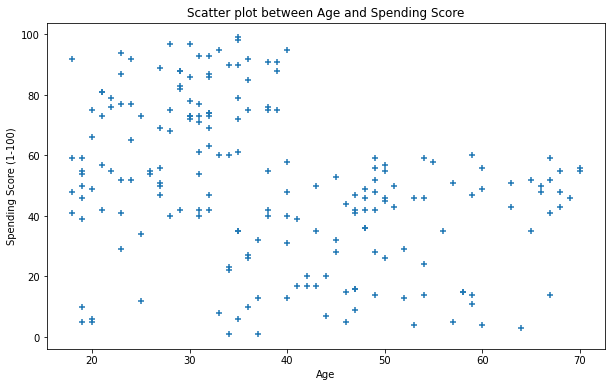

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data['Age'],data['Spending Score (1-100)'], marker='+');
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter plot between Age and Spending Score')

**Scatter plot between Age and Annual Income**

Text(0.5, 1.0, 'Scatter plot between Age and Annual Income')

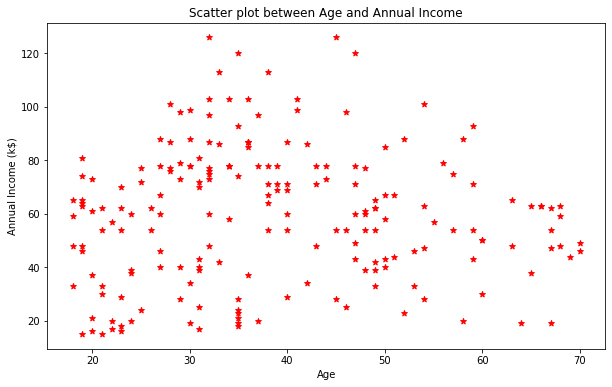

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data['Age'],data['Annual Income (k$)'], marker='*', color='red');
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter plot between Age and Annual Income')

## **Multivariate Analysis**

correlation between variables and mostly used methods to visualize correlation matrices is **heatmaps**.

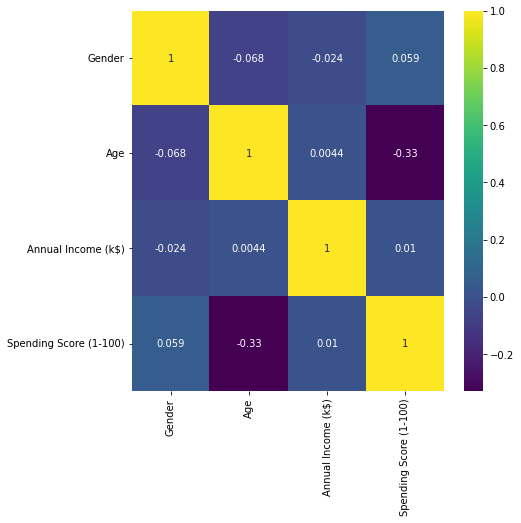

In [ ]:
fig_dims = (7, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(data.corr(), annot=True, cmap='viridis')

## **Standardizing the variables**